# An Exploratory Analysis of Loan Data from Prosper
## by David Eruemu


# Table of Contents 
<ol>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangle">Preliminary Wrangling</a></li> 
<li><a href="#Uni">Univariate Exploration</a></li>
<li><a href="#Bi"> Bivariate Exploration</a></li>
<li><a href="#Multi"> Multivariate Exploration</a></li>
<li><a href="#Conc"> Conclusions</a></li>
</ol>


<a id='intro'></a>
## Introduction
>This data set contains data from 113,937 loans by prosper with 81 variables on each loan describing information about the lender and the loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. 

### Column description
__ListingKey__	:	Unique key for each listing, same value as the 'key' used in the listing object in the API.  
__ListingNumber__	:	The number that uniquely identifies the listing to the public as displayed on the website.  
__ListingCreationDate__	:	The date the listing was created.  
__CreditGrade__	:	The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.  
__Term__	:	The length of the loan expressed in months.  
__LoanStatus__	:	The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.  
__ClosedDate__	:	Closed date is applicable for Cancelled, Completed, Chargedoff and Defaulted loan statuses.  
__BorrowerAPR__	:	The Borrower's Annual Percentage Rate (APR) for the loan.  
__BorrowerRate__	:	The Borrower's interest rate for this loan.  
__LenderYield__	:	The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.  
__EstimatedEffectiveYield__	:	Effective yield is equal to the borrower interest rate (i) minus the servicing fee rate, (ii) minus estimated uncollected interest on charge-offs, (iii) plus estimated collected late fees. Applicable for loans originated after July 2009.  
__EstimatedLoss__	:	Estimated loss is the estimated principal loss on charge-offs. Applicable for loans originated after July 2009.  
__EstimatedReturn__	:	The estimated return assigned to the listing at the time it was created. Estimated return is the difference between the Estimated Effective Yield and the Estimated Loss Rate. Applicable for loans originated after July 2009.  
__ProsperRating (numeric)__	:	The Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA. Applicable for loans originated after July 2009.  
__ProsperRating (Alpha)__	:	The Prosper Rating assigned at the time the listing was created between AA - HR. Applicable for loans originated after July 2009.  
__ProsperScore__	:	A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score. Applicable for loans originated after July 2009.  
__ListingCategory__	:	The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans  
__BorrowerState__	:	The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.  
__Occupation__	:	The Occupation selected by the Borrower at the time they created the listing.  
__EmploymentStatus__	:	The employment status of the borrower at the time they posted the listing.  
__EmploymentStatusDuration__	:	The length in months of the employment status at the time the listing was created.  
__IsBorrowerHomeowner__	:	A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.  
__CurrentlyInGroup__	:	Specifies whether or not the Borrower was in a group at the time the listing was created.  
__GroupKey__	:	The Key of the group in which the Borrower is a member of. Value will be null if the borrower does not have a group affiliation.  
__DateCreditPulled__	:	The date the credit profile was pulled.  
__CreditScoreRangeLower__	:	The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.  
__CreditScoreRangeUpper__	:	The upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency.  
__FirstRecordedCreditLine__	:	The date the first credit line was opened.  
__CurrentCreditLines__	:	Number of current credit lines at the time the credit profile was pulled.  
__OpenCreditLines__	:	Number of open credit lines at the time the credit profile was pulled.  
__TotalCreditLinespast7years__	:	Number of credit lines in the past seven years at the time the credit profile was pulled.  
__OpenRevolvingAccounts__	:	Number of open revolving accounts at the time the credit profile was pulled.  
__OpenRevolvingMonthlyPayment__	:	Monthly payment on revolving accounts at the time the credit profile was pulled.  
__InquiriesLast6Months__	:	Number of inquiries in the past six months at the time the credit profile was pulled.  
__TotalInquiries__	:	Total number of inquiries at the time the credit profile was pulled.  
__CurrentDelinquencies__	:	Number of accounts delinquent at the time the credit profile was pulled.  
__AmountDelinquent__	:	Dollars delinquent at the time the credit profile was pulled.  
__DelinquenciesLast7Years__	:	Number of delinquencies in the past 7 years at the time the credit profile was pulled.  
__PublicRecordsLast10Years__	:	Number of public records in the past 10 years at the time the credit profile was pulled.  
__PublicRecordsLast12Months__	:	Number of public records in the past 12 months at the time the credit profile was pulled.  
__RevolvingCreditBalance__	:	Dollars of revolving credit at the time the credit profile was pulled.  
__BankcardUtilization__	:	The percentage of available revolving credit that is utilized at the time the credit profile was pulled.  
__AvailableBankcardCredit__	:	The total available credit via bank card at the time the credit profile was pulled.  
__TotalTrades__	:	Number of trade lines ever opened at the time the credit profile was pulled.  
__TradesNeverDelinquent__	:	Number of trades that have never been delinquent at the time the credit profile was pulled.  
__TradesOpenedLast6Months__	:	Number of trades opened in the last 6 months at the time the credit profile was pulled.  
__DebtToIncomeRatio__	:	The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).  
__IncomeRange__	:	The income range of the borrower at the time the listing was created.  
__IncomeVerifiable__	:	The borrower indicated they have the required documentation to support their income.  
__StatedMonthlyIncome__	:	The monthly income the borrower stated at the time the listing was created.  
__LoanKey__	:	Unique key for each loan. This is the same key that is used in the API.  
__TotalProsperLoans__	:	Number of Prosper loans the borrower at the time they created this listing. This value will be null if the borrower had no prior loans.  
__TotalProsperPaymentsBilled__	:	Number of on time payments the borrower made on Prosper loans at the time they created this listing. This value will be null if the borrower had no prior loans.  
__OnTimeProsperPayments__	:	Number of on time payments the borrower had made on Prosper loans at the time they created this listing. This value will be null if the borrower has no prior loans.  
__ProsperPaymentsLessThanOneMonthLate__	:	Number of payments the borrower made on Prosper loans that were less than one month late at the time they created this listing. This value will be null if the borrower had no prior loans.  
__ProsperPaymentsOneMonthPlusLate__	:	Number of payments the borrower made on Prosper loans that were greater than one month late at the time they created this listing. This value will be null if the borrower had no prior loans.  
__ProsperPrincipalBorrowed__	:	Total principal borrowed on Prosper loans at the time the listing was created. This value will be null if the borrower had no prior loans.  
__ProsperPrincipalOutstanding__	:	Principal outstanding on Prosper loans at the time the listing was created. This value will be null if the borrower had no prior loans.  
__ScorexChangeAtTimeOfListing__	:	Borrower's credit score change at the time the credit profile was pulled. This will be the change relative to the borrower's last Prosper loan. This value will be null if the borrower had no prior loans.  
__LoanCurrentDaysDelinquent__	:	The number of days delinquent.  
__LoanFirstDefaultedCycleNumber__	:	The cycle the loan was charged off. If the loan has not charged off the value will be null.  
__LoanMonthsSinceOrigination__	:	Number of months since the loan originated.  
__LoanNumber__	:	Unique numeric value associated with the loan.  
__LoanOriginalAmount__	:	The origination amount of the loan.  
__LoanOriginationDate__	:	The date the loan was originated.  
__LoanOriginationQuarter__	:	The quarter in which the loan was originated.  
__MemberKey__	:	The unique key that is associated with the borrower. This is the same identifier that is used in the API member object.  
__MonthlyLoanPayment__	:	The scheduled monthly loan payment.  
__LP_CustomerPayments__	:	Pre charge-off cumulative gross payments made by the borrower on the loan. If the loan has charged off, this value will exclude any recoveries.  
__LP_CustomerPrincipalPayments__	:	Pre charge-off cumulative principal payments made by the borrower on the loan. If the loan has charged off, this value will exclude any recoveries.  
__LP_InterestandFees__	:	Pre charge-off cumulative interest and fees paid by the borrower. If the loan has charged off, this value will exclude any recoveries.  
__LP_ServiceFees__	:	Cumulative service fees paid by the investors who have invested in the loan.  
__LP_CollectionFees__	:	Cumulative collection fees paid by the investors who have invested in the loan.  
__LP_GrossPrincipalLoss__	:	The gross charged off amount of the loan.  
__LP_NetPrincipalLoss__	:	The principal that remains uncollected after any recoveries.  
__LP_NonPrincipalRecoverypayments__	:	The interest and fee component of any recovery payments. The current payment policy applies payments in the following order: Fees, interest, principal.  
__PercentFunded__	:	Percent the listing was funded.  
__Recommendations__	:	Number of recommendations the borrower had at the time the listing was created.  
__InvestmentFromFriendsCount__	:	Number of friends that made an investment in the loan.  
__InvestmentFromFriendsAmount__	:	Dollar amount of investments that were made by friends.  
__Investors__	:	The number of investors that funded the loan.  

<a id = "wrangle"></a>
## Preliminary Wrangling

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sb
import scipy as sp
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
%matplotlib inline

In [3]:
#set a base color to be used for plots
base_color = sb.color_palette()[0]

In [4]:
#read data into dataframe
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [5]:
#get a list of variables their sizes and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
#check for duplicated values
df.duplicated().any()

False

In [7]:
#get a statistical breakdown of the numerical variables
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

Fixing data type issues

In [8]:
#change data types to datetime
df['ListingCreationDate'] = pd.to_datetime(df['ListingCreationDate'])
df['ClosedDate'] = pd.to_datetime(df['ClosedDate'])
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])


In [9]:
df['ListingNumber'] = df['ListingNumber'].astype('object')

In [10]:
#create list of ratings in order
ratings = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
#change to categorical data type
ratingclass = pd.api.types.CategoricalDtype(ordered=True, categories=ratings)
df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].astype(ratingclass)  

In [11]:
#replace '$0' with 'Not employed'
df['IncomeRange'].replace('$0','Not employed', inplace=True)
#create list of income ranges
incomerange = [ '$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', 'Not employed']
# change income ranges to categorical type
incomeclass = pd.api.types.CategoricalDtype(ordered=True, categories=incomerange)
df['IncomeRange'] = df['IncomeRange'].astype(incomeclass)

In [12]:
#create list of employment statuses
employmentstatus = ['Self-employed', 'Employed', 'Full-time', 'Other','Not employed', 'Part-time', 'Retired']
#change employment status to categorical data type
employclass = pd.api.types.CategoricalDtype(ordered=False, categories=employmentstatus)
df['EmploymentStatus'] = df['EmploymentStatus'].astype(employclass)

In [13]:
#replace multiple iterations of 'past due'
df['LoanStatus'].replace(['Past Due (1-15 days)', 'Past Due (31-60 days)',
       'Past Due (61-90 days)', 'Past Due (91-120 days)',
       'Past Due (16-30 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'],'Past Due', inplace=True)

In [14]:
#change loan status to categorical data type
loanstatus = ['Current', 'Completed', 'Past Due','Cancelled', 'Chargedoff', 'Defaulted']
loanclass = pd.api.types.CategoricalDtype(ordered=True, categories = loanstatus)

In [15]:
#replace numeric values of listing category with what they represent 
df['ListingCategory (numeric)'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
                                                      ['Not Available', 'Debt Consolidation','Home Improvement','Business',
                                                       'Personal Loan','Student Use','Auto','Other','Baby&Adoption','Boat',
                                                       'Cosmetic Procedure','Engagement Ring','Green Loans','Household Expenses',
                                                       'Large Purchases','Medical/Dental','Motorcycle','RV', 'Taxes','Vacation',
                                                       'Wedding Loans'], inplace=True)

In [16]:
#change listing category to categorical data type
listcategory =  ['Not Available', 'Debt Consolidation','Home Improvement','Business',
                                                       'Personal Loan','Student Use','Auto','Other','Baby&Adoption','Boat',
                                                       'Cosmetic Procedure','Engagement Ring','Green Loans','Household Expenses',
                                                       'Large Purchases','Medical/Dental','Motorcycle','RV', 'Taxes','Vacation',
                                                       'Wedding Loans']
categoryclass = pd.api.types.CategoricalDtype(ordered=False, categories = listcategory)
df['ListingCategory (numeric)']=df['ListingCategory (numeric)'].astype(categoryclass)

In [17]:
#remove 'numeric' from column title
df.rename(columns={"ListingCategory (numeric)":"ListingCategory"},inplace=True)

### What is the structure of your dataset?

> This dataset has 113937 observations and 81 variables. The data set has no duplicate records.

### What is/are the main feature(s) of interest in your dataset?

> The main features I will be focusing on in this analysis are:
>1. Loan Original Amount
2. Income Range
3. Prosper Rating.
4. Listing Category

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>1. Loan Status
2. Estimated EFfective Yield
3. Estimated Loss

<a id = "Bi"></a>
## Univariate Exploration

> In this section, I will be investigating distributions of individual variables.

Firstly, i would like to investigate the distribution of some of the interesting numeric variables

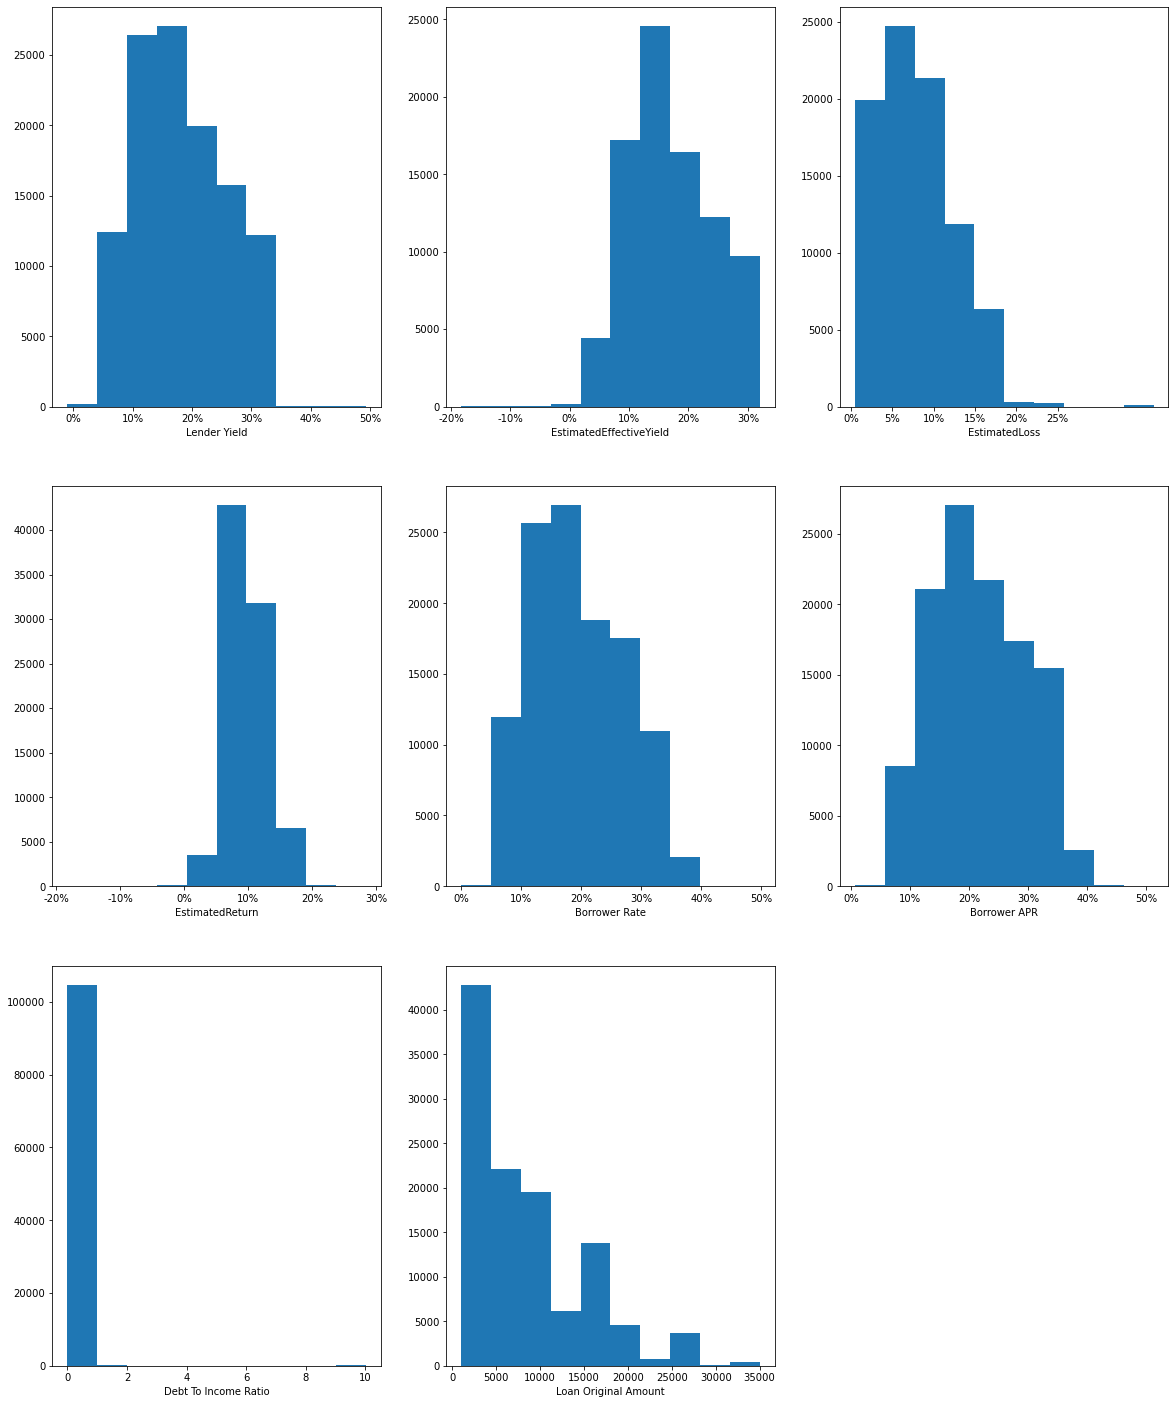

In [18]:
#plot histograms for numeric variables
def tick():
    """Set ticks for the range of the histograms in percentages"""
    tick = plt.xticks()[0]
    percent =tick*100
    label = []
    for i in percent:
        label.append(str('{:0.0f}'.format(i))+'%')
    plt.xticks(tick[1:7], labels = label[1:7])

plt.figure(figsize= (20,25))

plt.subplot(3,3,1)
plt.hist(df['LenderYield'])
tick()
#set label on x axis
plt.xlabel('Lender Yield');

plt.subplot(3,3,2)
plt.hist(df['EstimatedEffectiveYield'])
tick()
plt.xlabel('EstimatedEffectiveYield');

plt.subplot(3,3,3)
plt.hist(df['EstimatedLoss'])
tick()
#set label on x axis
plt.xlabel('EstimatedLoss');

plt.subplot(3,3,4)
plt.hist(df['EstimatedReturn'])
tick()
#set label on x axis
plt.xlabel('EstimatedReturn');

plt.subplot(3,3,5)
plt.hist(df['BorrowerRate'])
tick()
#set label on x axis
plt.xlabel('Borrower Rate')

plt.subplot(3,3,6)
plt.hist(df['BorrowerAPR'])
tick()
#set label on x axis
plt.xlabel('Borrower APR');

plt.subplot(3,3,7)
plt.hist(df['DebtToIncomeRatio'])
#set label on x axis
plt.xlabel('Debt To Income Ratio');

plt.subplot(3,3,8)
plt.hist(df['LoanOriginalAmount'])
#set label on x axis
plt.xlabel('Loan Original Amount');




The distributions are unimodal and fairly normal with estimated loss skewed slightly to the left. I decided to double the bin size to discover any features that might be hidden 

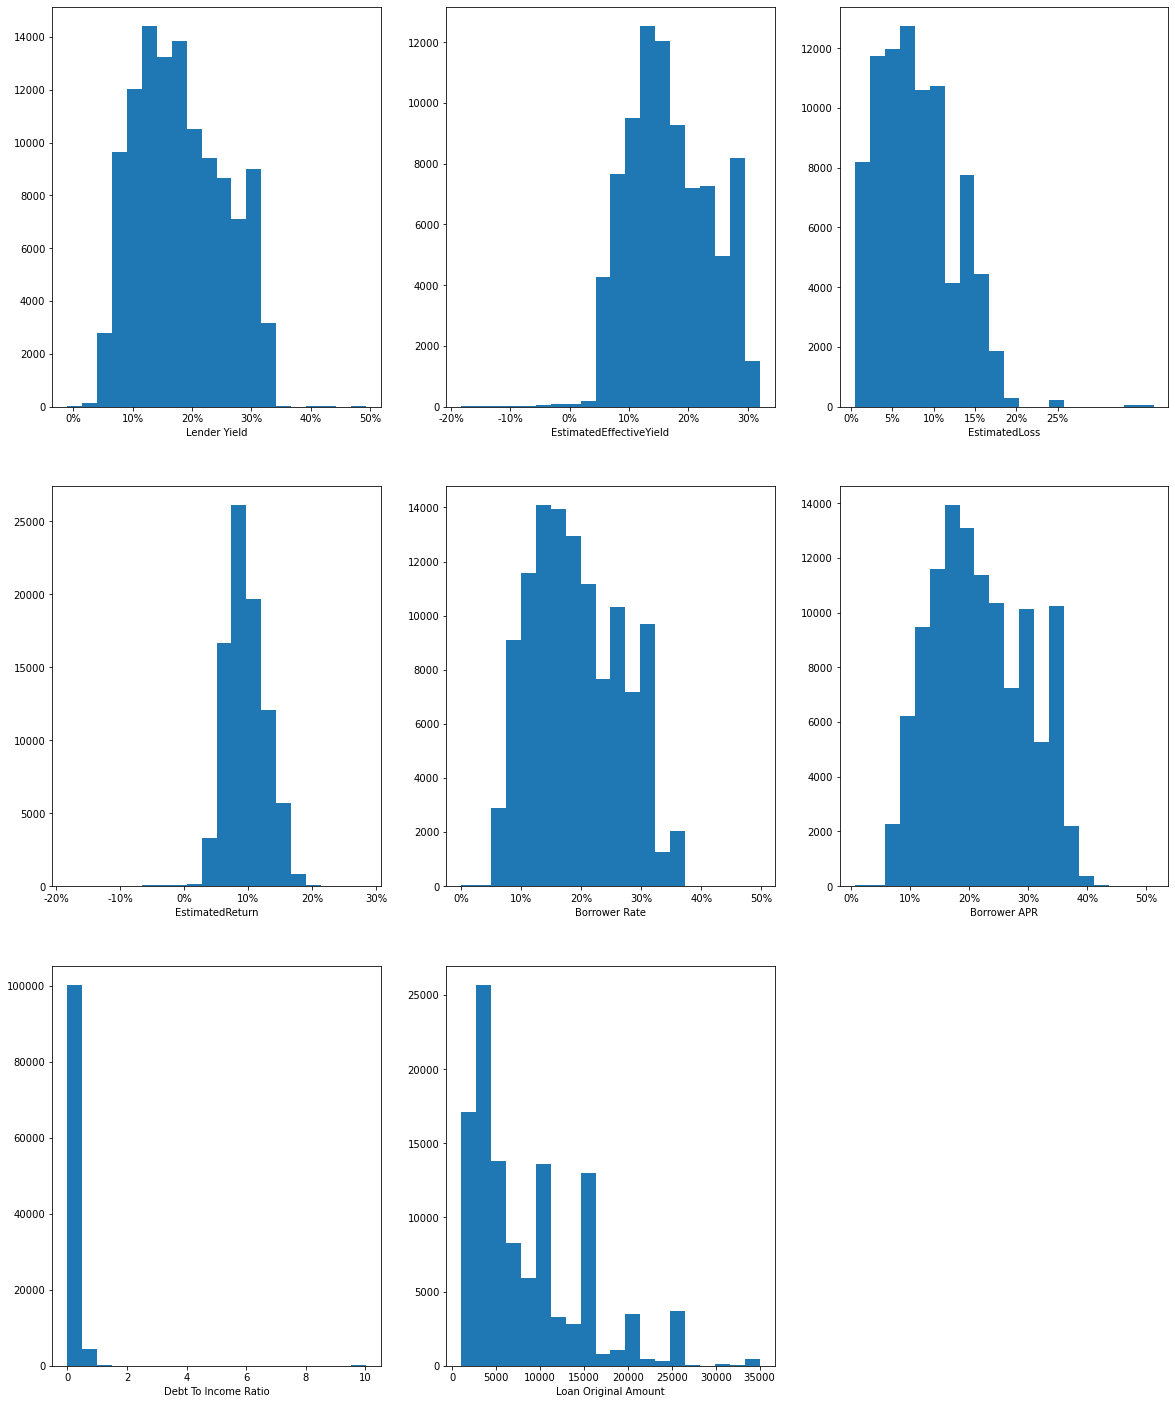

In [19]:
#increase the bin size
plt.figure(figsize= (20,25))

plt.subplot(3,3,1)
plt.hist(df['LenderYield'], bins=20)
tick()
#set label on x axis
plt.xlabel('Lender Yield');

plt.subplot(3,3,2)
plt.hist(df['EstimatedEffectiveYield'], bins=20)
tick()
#set label on x axis
plt.xlabel('EstimatedEffectiveYield');

plt.subplot(3,3,3)
plt.hist(df['EstimatedLoss'], bins=20)
tick()
#set label on x axis
plt.xlabel('EstimatedLoss');

plt.subplot(3,3,4)
plt.hist(df['EstimatedReturn'], bins=20)
tick()
#set label on x axis
plt.xlabel('EstimatedReturn');

plt.subplot(3,3,5)
plt.hist(df['BorrowerRate'], bins=20)
tick()
#set label on x axis
plt.xlabel('Borrower Rate')

plt.subplot(3,3,6)
plt.hist(df['BorrowerAPR'], bins=20)
tick()
#set label on x axis
plt.xlabel('Borrower APR');

plt.subplot(3,3,7)
plt.hist(df['DebtToIncomeRatio'], bins=20)
#set label on x axis
plt.xlabel('Debt To Income Ratio');

plt.subplot(3,3,8)
plt.hist(df['LoanOriginalAmount'], bins=20)
#set label on x axis
plt.xlabel('Loan Original Amount');


Changing the bin size doesn't affect the visual in any other than the `Loan Original Amount`.

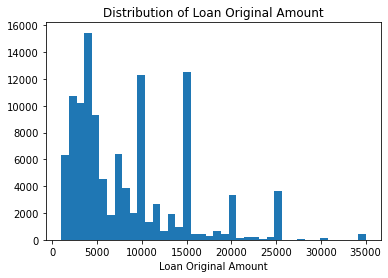

In [20]:
#plot histogram for loan original amount with a bin size of 40
plt.hist(df['LoanOriginalAmount'], bins=40)
plt.xlabel('Loan Original Amount')
plt.title('Distribution of Loan Original Amount');

Increasing the bin size further shows an increasing relatively discrete property in the distribution as the loan value increases

Another intersting variable is the `LoanStatus`

In [21]:
#store the counts of each loan status in a variable
statusvalues = df.LoanStatus.value_counts()
statusvalues

Current       56576
Completed     38074
Chargedoff    11992
Defaulted      5018
Past Due       2272
Cancelled         5
Name: LoanStatus, dtype: int64

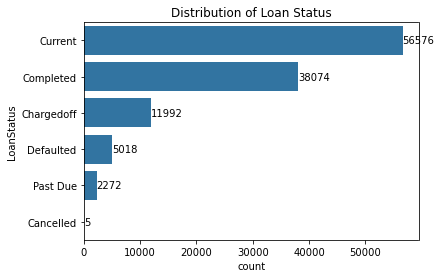

In [22]:
plt.figure
sb.countplot(data=df, y='LoanStatus', order=statusvalues.index, color=base_color)
plt.title('Distribution of Loan Status');
#include text on the bars by iterating through the values 
for i in range(statusvalues.shape[0]):
    plt.text(statusvalues[i], i ,statusvalues[i], va = 'center' )

There are currently more active loans than completed loans which is an indicator of a significant growth over time

I decided to investigate this growth over time by looking at the growth trend of listing creation and closure

In [23]:
#get the maximum and minimum values for creation date, origination date and close date
print(df['ListingCreationDate'].min())
print(df['ListingCreationDate'].max())
print(df['ClosedDate'].min())
print(df['ClosedDate'].max())
print(df['LoanOriginationDate'].min())
print(df['LoanOriginationDate'].max())

2005-11-09 20:44:28.847000
2014-03-10 12:20:53.760000
2005-11-25 00:00:00
2014-03-10 00:00:00
2005-11-15 00:00:00
2014-03-12 00:00:00


In [24]:
# excluding 2005 and 2014 from the bins because they aren't complete years and they would communicate wrong information
bins = [ '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']
dates = pd.to_datetime(bins, format='%Y')

In [25]:
#create bins for each of the variables
createbin = pd.cut(df.ListingCreationDate, dates)
closebin = pd.cut(df.ClosedDate, dates)
originatebin = pd.cut(df.LoanOriginationDate , dates)

In [26]:
#create 'y' values 
y_create = createbin.value_counts(sort=False)
y_close = closebin.value_counts(sort=False)
y_originate = originatebin.value_counts(sort=False)

In [27]:
#create 'x' values
x=bins[:-1]

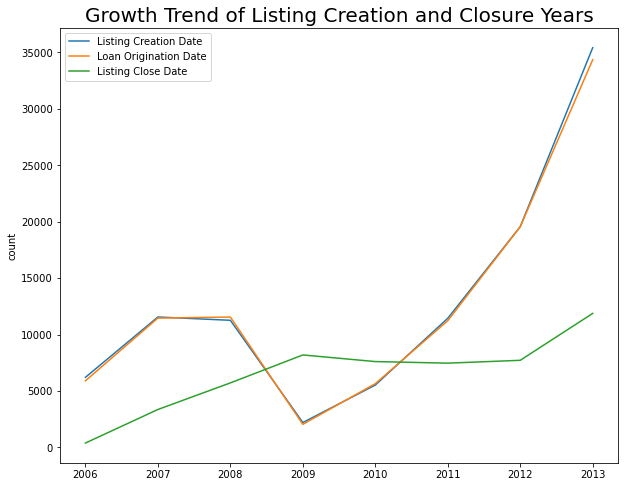

In [28]:
plt.figure(figsize= (10,8))
#create line plot of the three variables
plt.plot(x, y_create, label = 'Listing Creation Date')
plt.plot(x, y_originate, label = 'Loan Origination Date')
plt.plot(x, y_close, label = 'Listing Close Date')
plt.ylabel('count')
plt.legend()
plt.title('Growth Trend of Listing Creation and Closure Years', fontdict={'fontsize':20});

The most interesting feature of the visual above is the plateau between 2007 and 2008 followed by the dip in loans taken out. The effect of the dip on closed loans is shown in the plateau between 2009 and 2012 before the growth resumed

From the growth trend, we can see that it took 2 years for the loans closed to match the listings created in 2006. It wouldn't be out of place to assume that most loans are active for a duration of 2 years.

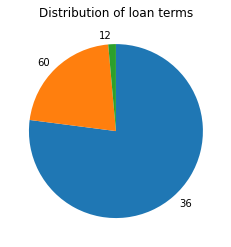

In [29]:
#plot a pie chart for the distribution of terms
pieslices= df.Term.value_counts()
plt.pie(pieslices, labels = pieslices.index, startangle = 90, counterclock = False)
plt.title('Distribution of loan terms');

After inspecting the frequencies of the various loan terms, I observed that over three quarters of the loans taken out were for a 36 month term. Just under the 2 year assumption made earlier

An interesting feature of this dataset is the prosper rating system. it's an indicator of the risk involved in a particular loan given out with HR being the highest risk and AA being the lowest

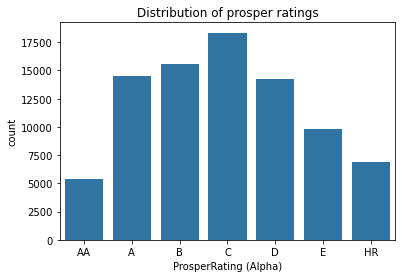

In [30]:
#plot a bar chart showing the distribution of prosper ratings
sb.countplot(data = df, x ='ProsperRating (Alpha)', color=base_color)
plt.title('Distribution of prosper ratings');

The most common rating is the `C` rating. The least common is the `AA` which is the least possible risk involved. The `B` and `A` ratings are the most common after `C`. This implies that the company is less likely to give out loans to high risk individuals

I decided to look into more demographic information. The `EmploymentStatus`, `BorrowerState`  and `IncomeRange` variables seemed like a good place to start

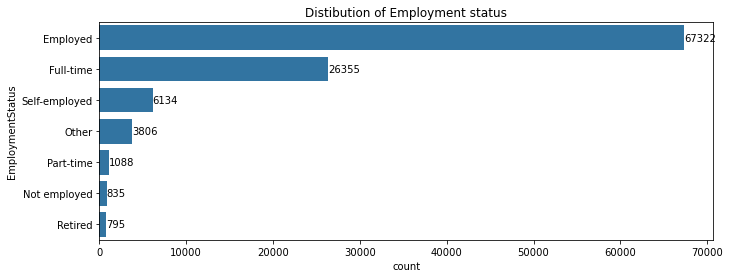

In [31]:
#plot bar chart
plt.figure(figsize=(11,4))
plt.title('Distibution of Employment status')
statusvalues=df['EmploymentStatus'].value_counts()
sb.countplot(data = df, y ='EmploymentStatus', order = statusvalues.index, color=base_color)
#include text on the bars by iterating through the values 
for i in range(statusvalues.shape[0]):
    plt.text(statusvalues[i], i ,statusvalues[i], va = 'center' )

More than half the people who took out the loans are employed

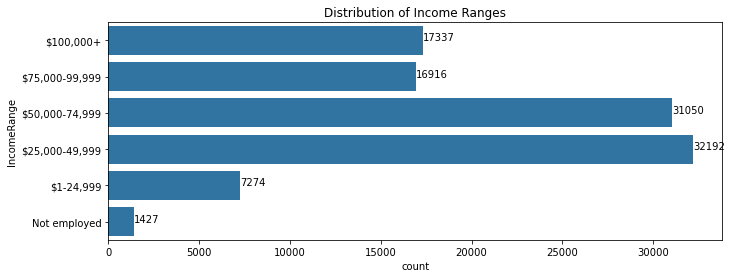

In [32]:
#plot bar chart
plt.figure(figsize=(11,4))
incomerange=df.IncomeRange.value_counts(sort=False)
plt.title('Distribution of Income Ranges')
sb.countplot(data=df, y='IncomeRange', color=base_color)
#include text on the bars by iterating through the values 
for i in range(incomerange.shape[0]):
    plt.text(incomerange[i], i, incomerange[i])

The median annual income int the united states is $41,535. Hence most people taking out loans are middle class

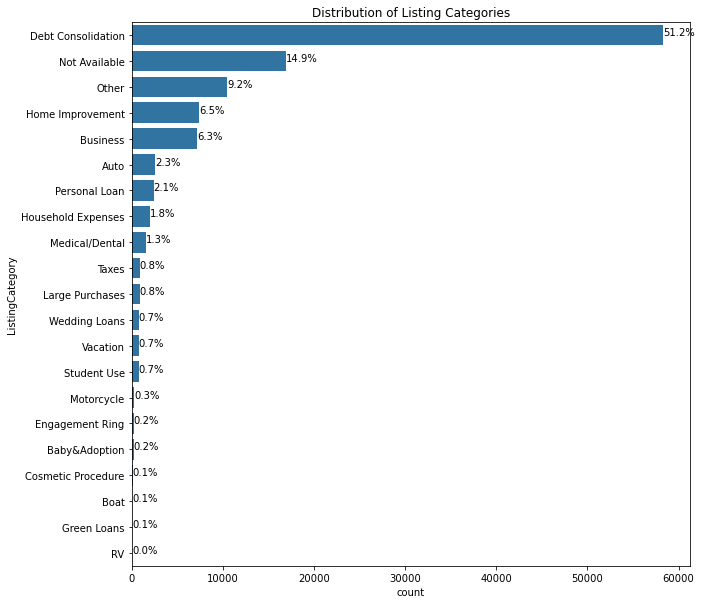

In [33]:
#plot bar chart
plt.figure(figsize=(10,10))
size=df['ListingCategory'].shape[0]
categories=df['ListingCategory'].value_counts()
sb.countplot(data = df, y='ListingCategory', order = categories.index, color = base_color)
plt.title('Distribution of Listing Categories')
#include text on the bars by iterating through the values 
for i in range(categories.shape[0]):
    plt.text(categories[i], i, str(format(categories[i]/size*100,'.1f'))+'%')

Most loans are taken out to refinance other loans

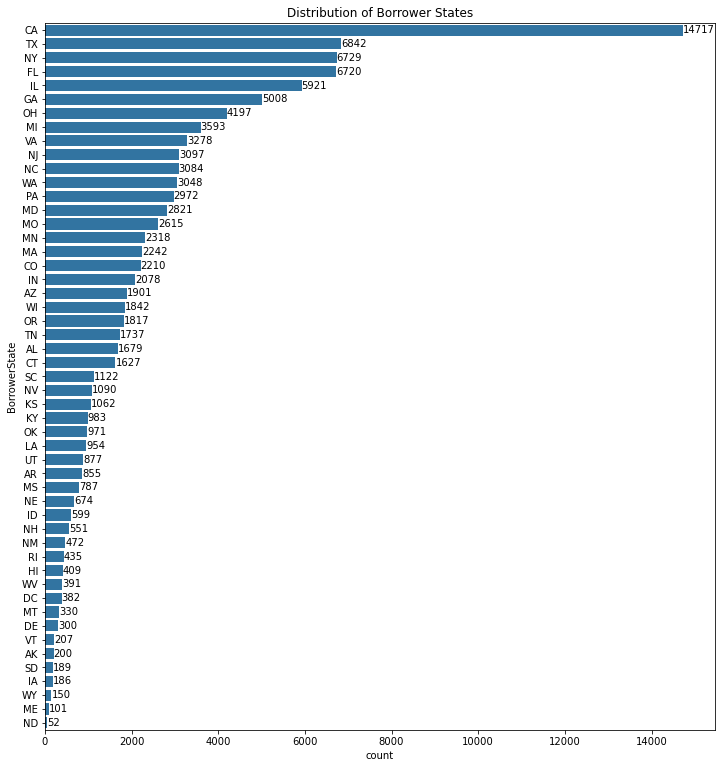

In [34]:
#plot bar chart
plt.figure(figsize= (12,13))
statevalue = df.BorrowerState.value_counts()
sb.countplot(data=df, y='BorrowerState', order = statevalue.index, color=base_color)
plt.title('Distribution of Borrower States');
#include text on the bars by iterating through the values 
for i in range(statevalue.shape[0]):
    plt.text(statevalue[i], i ,statevalue[i], va = 'center' )

The loans taken out in California are more than double the loans taken out in any other state

Let's explore the distribution of debt to income ratio of customers 

In [35]:
#create a mask to cut out the unemployed entries
employedmask=df['IncomeRange']!='Not employed'

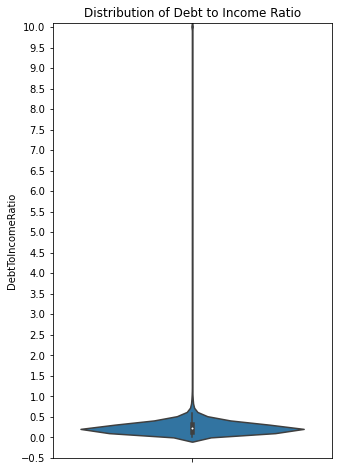

In [36]:
#plot violin plot
plt.figure(figsize=(5,8))
sb.violinplot(data=df[employedmask], y ='DebtToIncomeRatio', color = sb.color_palette()[0])
plt.title('Distribution of Debt to Income Ratio')
#set y-ticks
plt.yticks(np.arange(-0.5, 10.01, 0.5))
#choose a display range 
plt.ylim(-0.5,10.1);

Most of the customers have debt to income ratios that fall between 0 and 0.5. There are a large range of outliers from 1 to 10.1

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
A number of conclusions can be drawn from the analysis above, including but not limited to:
1. There is a near discrete property in the distribution as the loan value increases 
2. There are currently more active loans than completed loans which is an indicator of a significant growth over time
3. The growth in loans taken out plateaus takes a significant dip between 2007 and 2008. The effect of the dip on closed loans is shown in the plateau between 2009 and 2012 before the growth resumed.
4. Over three quarters of the loans taken out were for a 36 month term.
5. The most common rating is the C rating. The least common is the AA which is the least possible risk involved. The B and A ratings are the most common after C. This implies that the company is less likely to give out loans to high risk individuals
6. Most people taking out loans are middle class
7. Most loans are taken out to refinance other loans

<a id = "Bi"></a>
## Bivariate Exploration


Let's kick off this section with numeric variables again by investigating the correlation between the a few key ones

In [37]:
#create a list of numeric variables to use in the correlation plot
numeric_vars = ['BorrowerRate','BorrowerAPR','Term', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
               'LoanOriginalAmount']

Text(0.5, 1.0, 'Scatter matrix of numeric variables')

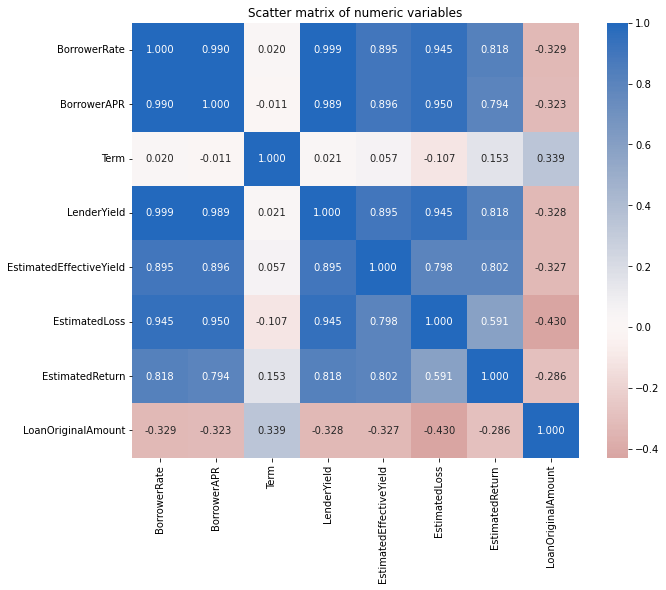

In [38]:
# correlation plot
plt.figure(figsize = [10, 8])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Scatter matrix of numeric variables')

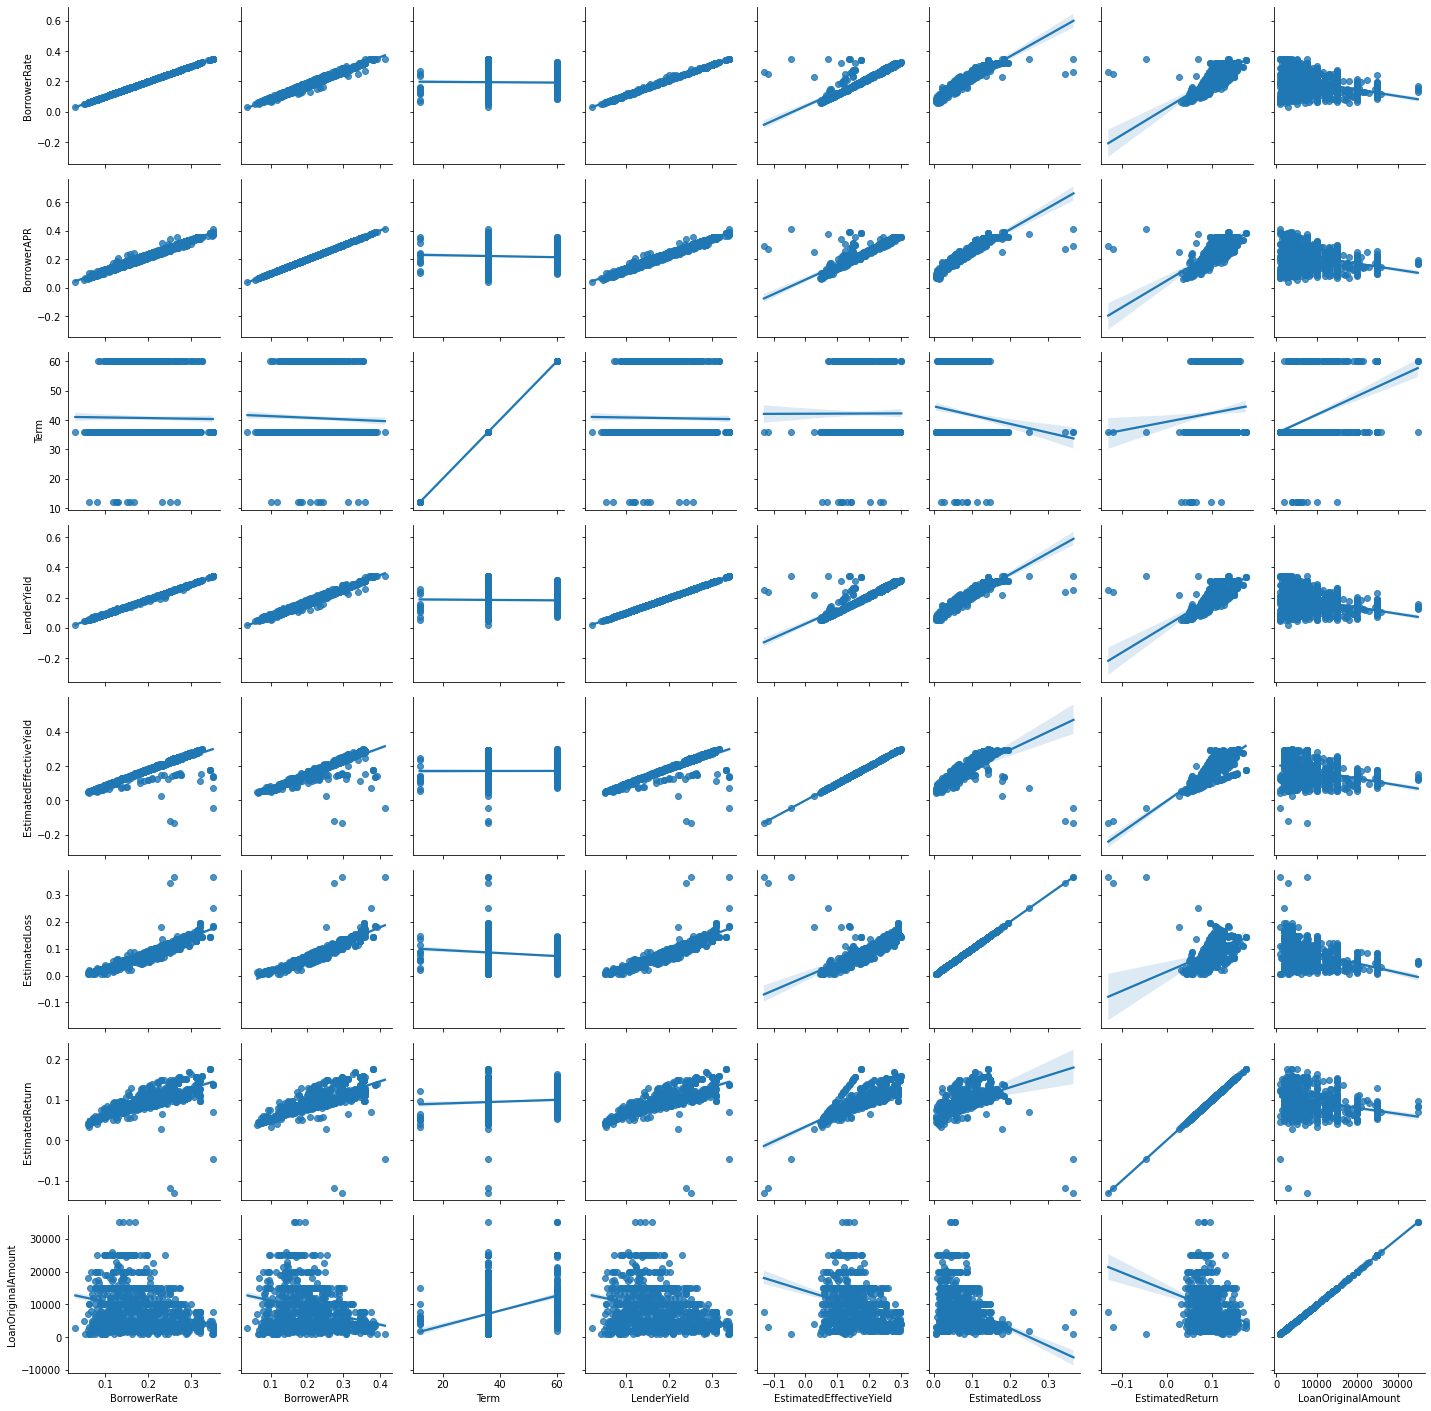

In [39]:
#get a random sample of the data set to avoid overplotting
subset = df.sample(1000)
#use the pairgrid to plot all the relationships with these variables at once 
g = sb.PairGrid(data=subset, vars = numeric_vars)
g.map(sb.regplot)

From the above two visualizations, we can see that most of the numeric variables have a high positive correlation coefficient with each other. The exceptions are the loan original amount and the loan term. These have moderate to low correlation with the others. Let's carry out log and cubic transformations

In [40]:
# compute the logarithm
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
# compute the cube root
def cuberoot_trans(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3

In [41]:
#apply the transformations
df['cubeyield'] = df['EstimatedEffectiveYield'].apply(cuberoot_trans)
df['logyield'] = df['EstimatedEffectiveYield'].apply(log_trans)

In [42]:
#get a random sample of the data set to avoid overplotting
subset = df.sample(1000)

<AxesSubplot:xlabel='EstimatedEffectiveYield', ylabel='LoanOriginalAmount'>

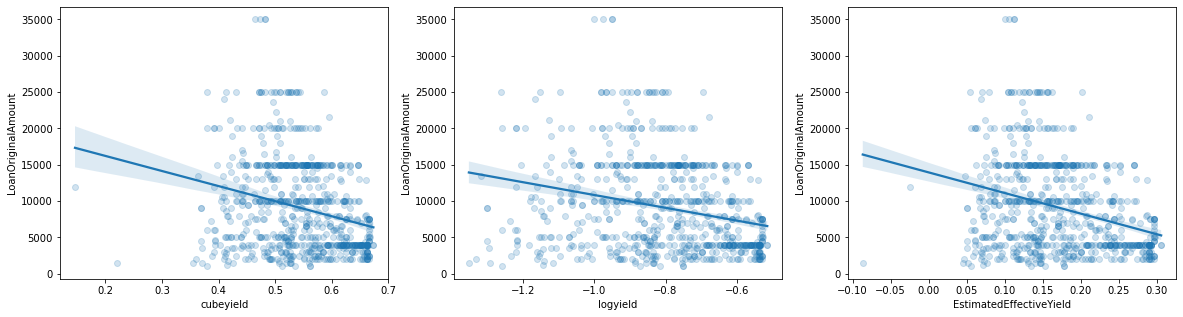

In [43]:
#plot the yield beside the transformed values
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sb.regplot(data = subset, x = 'cubeyield', y = 'LoanOriginalAmount', scatter_kws={'alpha':1/5})
plt.subplot(1,3,2)
sb.regplot(data = subset, x = 'logyield', y = 'LoanOriginalAmount',scatter_kws={'alpha':1/5})
plt.subplot(1,3,3)
sb.regplot(data = subset, x = 'EstimatedEffectiveYield', y = 'LoanOriginalAmount',scatter_kws={'alpha':1/5})

There isn't much of a difference between the transformations. This may be because of the imaginary numbers which are discarded when plotting.

In the earlier section, we looked at the distribution of prosper rating values. Let's explore the statuses of each rating to determine whether the rating properly predicts the likeliness of the loan being repaid 

<Figure size 1440x1440 with 0 Axes>

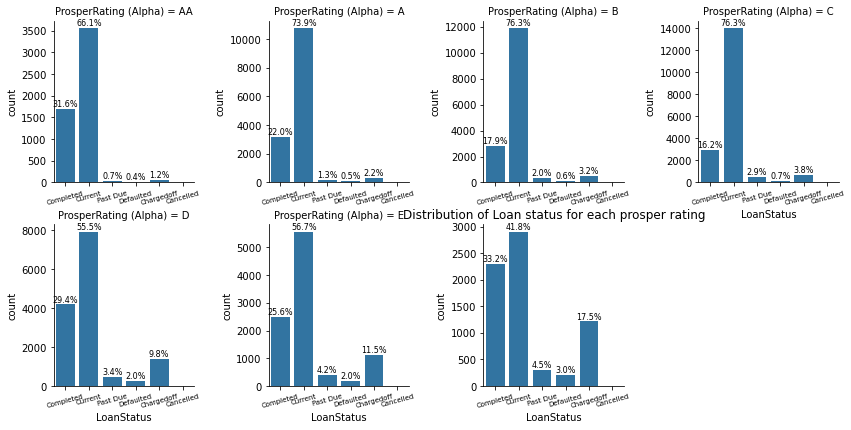

In [44]:
plt.figure(figsize=(20,20))
#plot a facet plot
g = sb.FacetGrid(data=df, col = 'ProsperRating (Alpha)', sharey=False, sharex=False, col_wrap=4)
g.map(sb.countplot, 'LoanStatus',order=df.LoanStatus.unique());
g.set_xticklabels(rotation=15, fontsize=7)
plt.title('Distribution of Loan status for each prosper rating')
#add text on each plot
for ax in g.axes:
    #create a list of the count of each prosper rating
    size=[]
    for p in ax.patches:
        try:
            size.append(int(p.get_height()))
        except ValueError:
            size.append(0)
    i=0
    for p in ax.patches:
        ax.annotate(str(format(size[i]/sum(size)*100,'.1f'))+'%', (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),textcoords='offset points')
        i+=1
  

The percentage of 'charged off', 'defaulted' and 'past due' loans decreases as the prosper rating increases. This points to a relaibility of the rating system

What is the relationship between a customers employment status and his income range

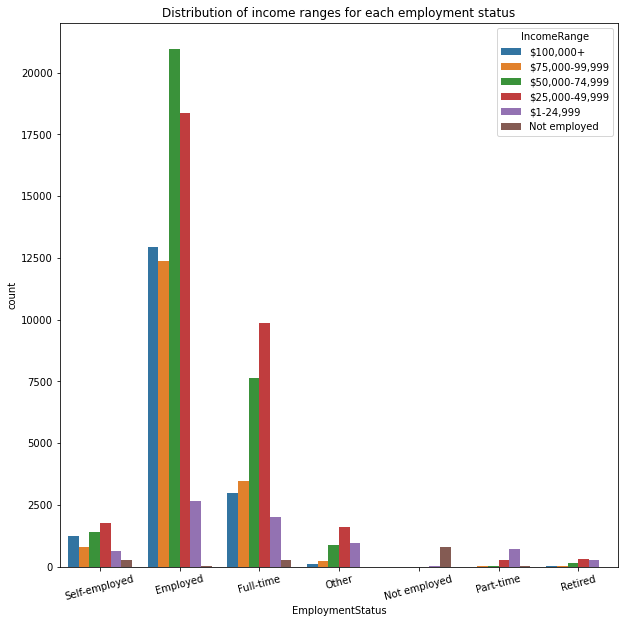

In [45]:
#plot bar chart
plt.figure(figsize = [10, 10])
plt.xticks(rotation=15)
plt.title('Distribution of income ranges for each employment status')
sb.countplot(data = df,hue='IncomeRange' ,x ='EmploymentStatus');

From the above graphic, we can make some assumptions on various economic demographics. Most employed peole make at least 50,000 and unemployed make no more than 25,000. Self employed and retired customers have a lot of variation although the sample size is relatively small

Let's explore the relationship between income range and the prosper rating

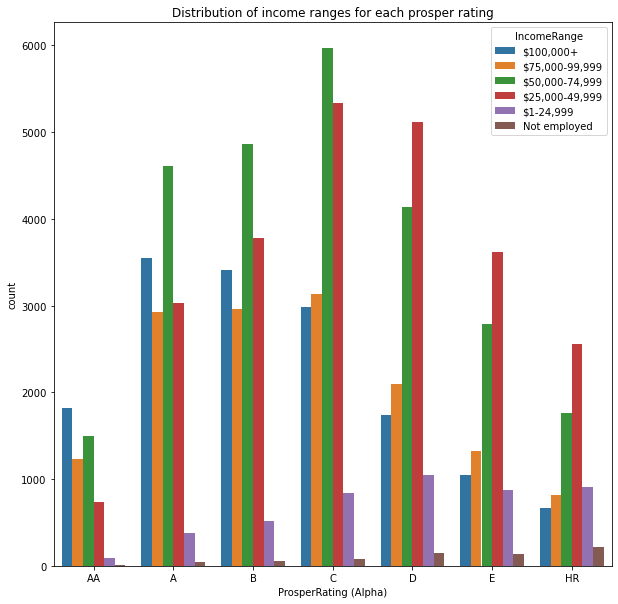

In [46]:
#plot bar chart
plt.figure(figsize = [10, 10])
plt.title('Distribution of income ranges for each prosper rating')
sb.countplot(data = df,hue='IncomeRange' ,x ='ProsperRating (Alpha)');

The first noticeable thing for me is the absence of the `not displayed` category. To explain this, we just have to remember that the rating system only began in July 2009. A probable explanation would be improved data collection system.

Another noticeable feature would be the relative increase in $100,000+ earners as the rating increases as well as a decrease in unemployed and low earners. 
We can flip the x axis and the hue for ann interesting visual

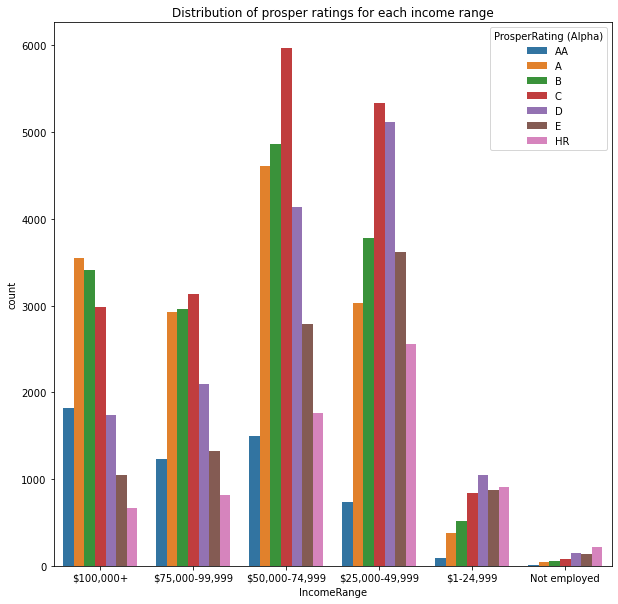

In [47]:
#reverse the x and hue values of the above plot
plt.figure(figsize = [10, 10])
plt.title('Distribution of prosper ratings for each income range')
sb.countplot(data = df,x='IncomeRange' ,hue ='ProsperRating (Alpha)');

judging from this visual, we can tell that it's generally considered high risk the give out loans to unemployed customers. The`AA` rating is also considerably rare seeing as it's the lowest rating in all the income ranges except `$75,000 - $99,000` where it's only the second lowest and `$100,000` where it's the 4th most common. 

Lets explore the relationship between the debt to income ratio and the income ranges


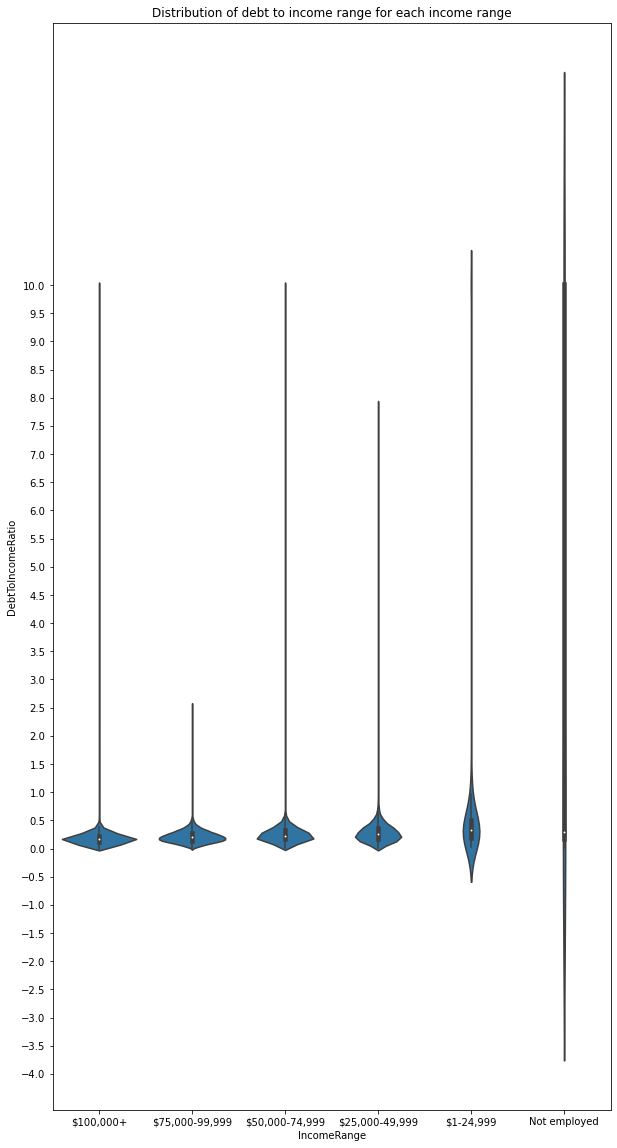

In [48]:
#plot violin plot
plt.figure(figsize=[10,20])
plt.title('Distribution of debt to income range for each income range')
sb.violinplot(data=df, x = 'IncomeRange', y ='DebtToIncomeRatio', color = sb.color_palette()[0])
plt.yticks(np.arange(-4, 10.01, 0.5));

The violin plot for the `Not employed` income range shows that the Debt to Income distribution spreads for the entire range. Other than that, it isn't very readable so i'll exclude it

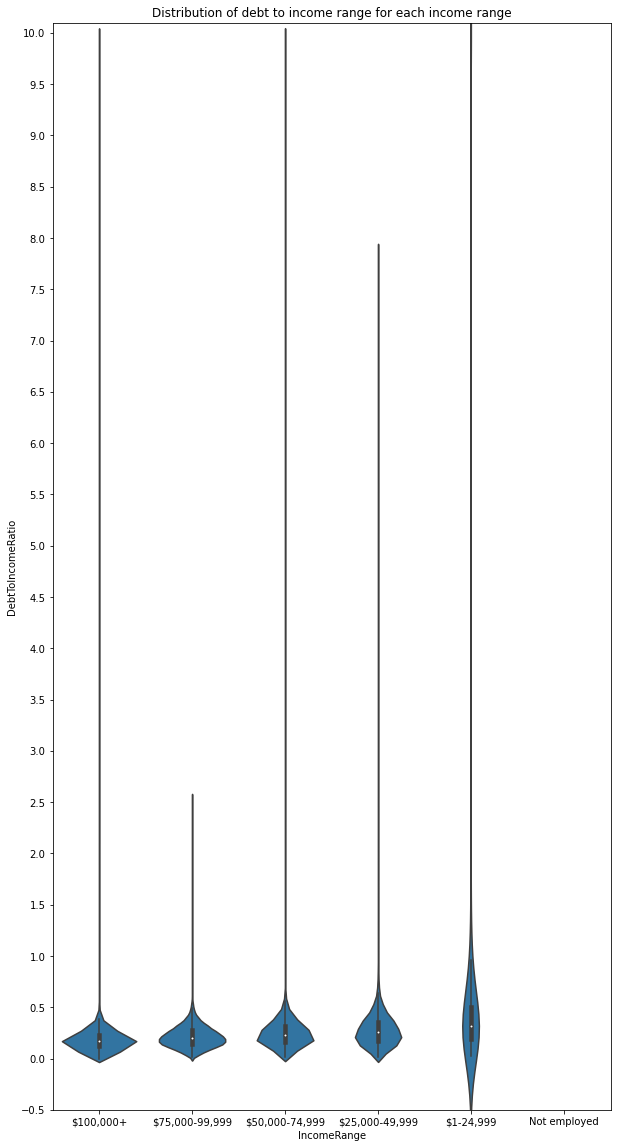

In [49]:
plt.figure(figsize=[10,20])
plt.title('Distribution of debt to income range for each income range')
sb.violinplot(data=df[employedmask], x = 'IncomeRange', y ='DebtToIncomeRatio', color = sb.color_palette()[0])
#set y ticks
plt.yticks(np.arange(-1, 10.01, 0.5))
#choose a display range 
plt.ylim(-0.5,10.1);

The median Debt to Income Ratio slightly increases as the income range decreases.The standard deviiation also increases as the income range decreases. The `$75,000-$99,999` range has the smallest spread

Let's repeat the plot above, but with the prosper rating instead of income range

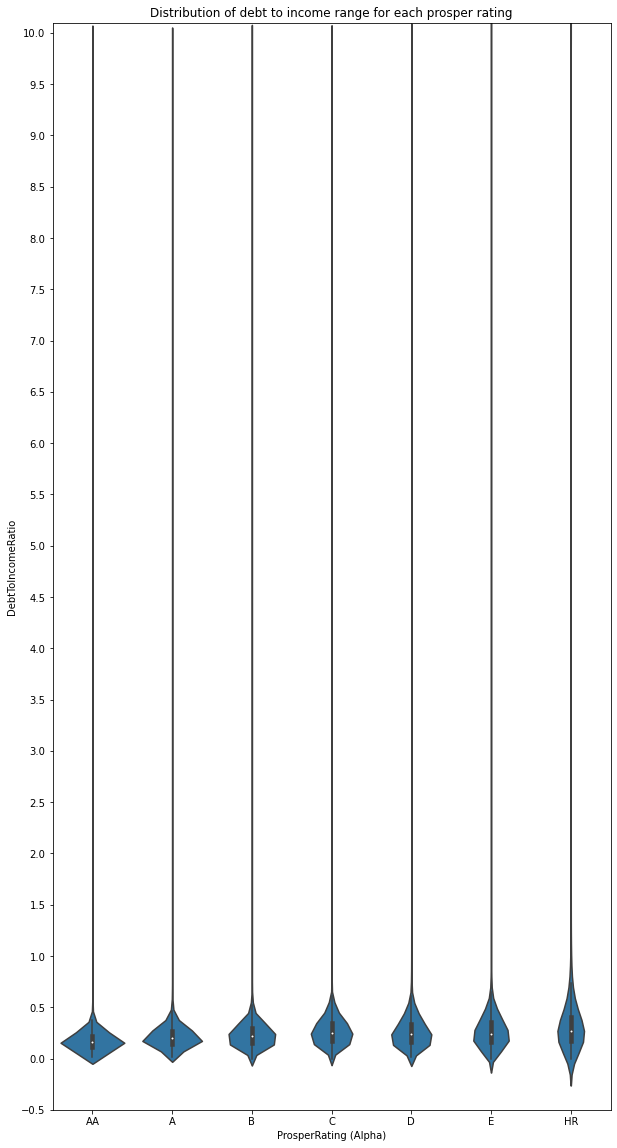

In [50]:
plt.figure(figsize=[10,20])
plt.title('Distribution of debt to income range for each prosper rating')
sb.violinplot(data=df[employedmask], x = 'ProsperRating (Alpha)', y ='DebtToIncomeRatio', color = sb.color_palette()[0])
plt.yticks(np.arange(-0.5, 10.01, 0.5))
#choose a display range 
plt.ylim(-0.5,10.1);

The median Debt to income ratio is similar across prosper ratings. The major difference is the distribution. The kernels become more triangular and the standard deviation decreases as the rating increases 

Let's inspect the relationship between the income range and the Loan amount

<AxesSubplot:title={'center':'Distribution of loan original amount for each income range'}, xlabel='IncomeRange', ylabel='LoanOriginalAmount'>

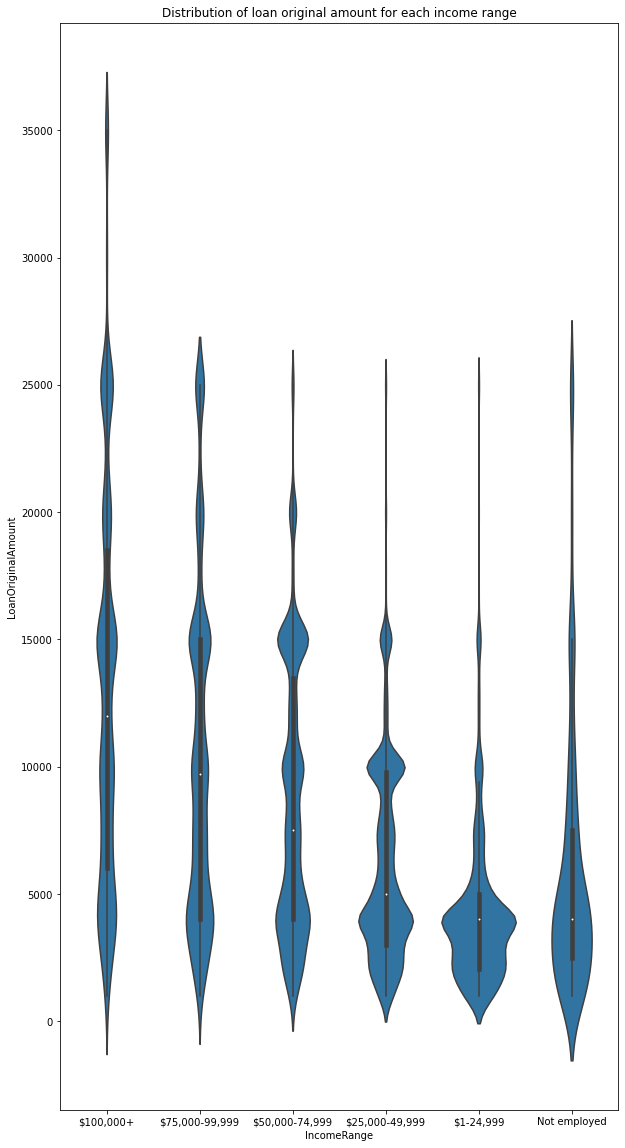

In [51]:
#plot violin plot
plt.figure(figsize=[10,20])
plt.title('Distribution of loan original amount for each income range')
sb.violinplot(data=df, x = 'IncomeRange', y ='LoanOriginalAmount', color = sb.color_palette()[0])

The key finding here is the larger spread of the distribution of loan original amount as the Income range increases. The median loan amount increases asthe income range increases

In [52]:
#create a dataframe containing the data to be plotted
counts = df.groupby(['IncomeRange', 'ListingCategory']).size()
counts = counts.reset_index(name='count')
sums=counts.groupby('IncomeRange').sum()
counts = counts.pivot(index = 'IncomeRange', columns = 'ListingCategory', values = 'count')
counts = pd.concat([counts,sums], axis=1)
counts = counts.iloc[:,:-1].div(counts['count']/100, axis=0)


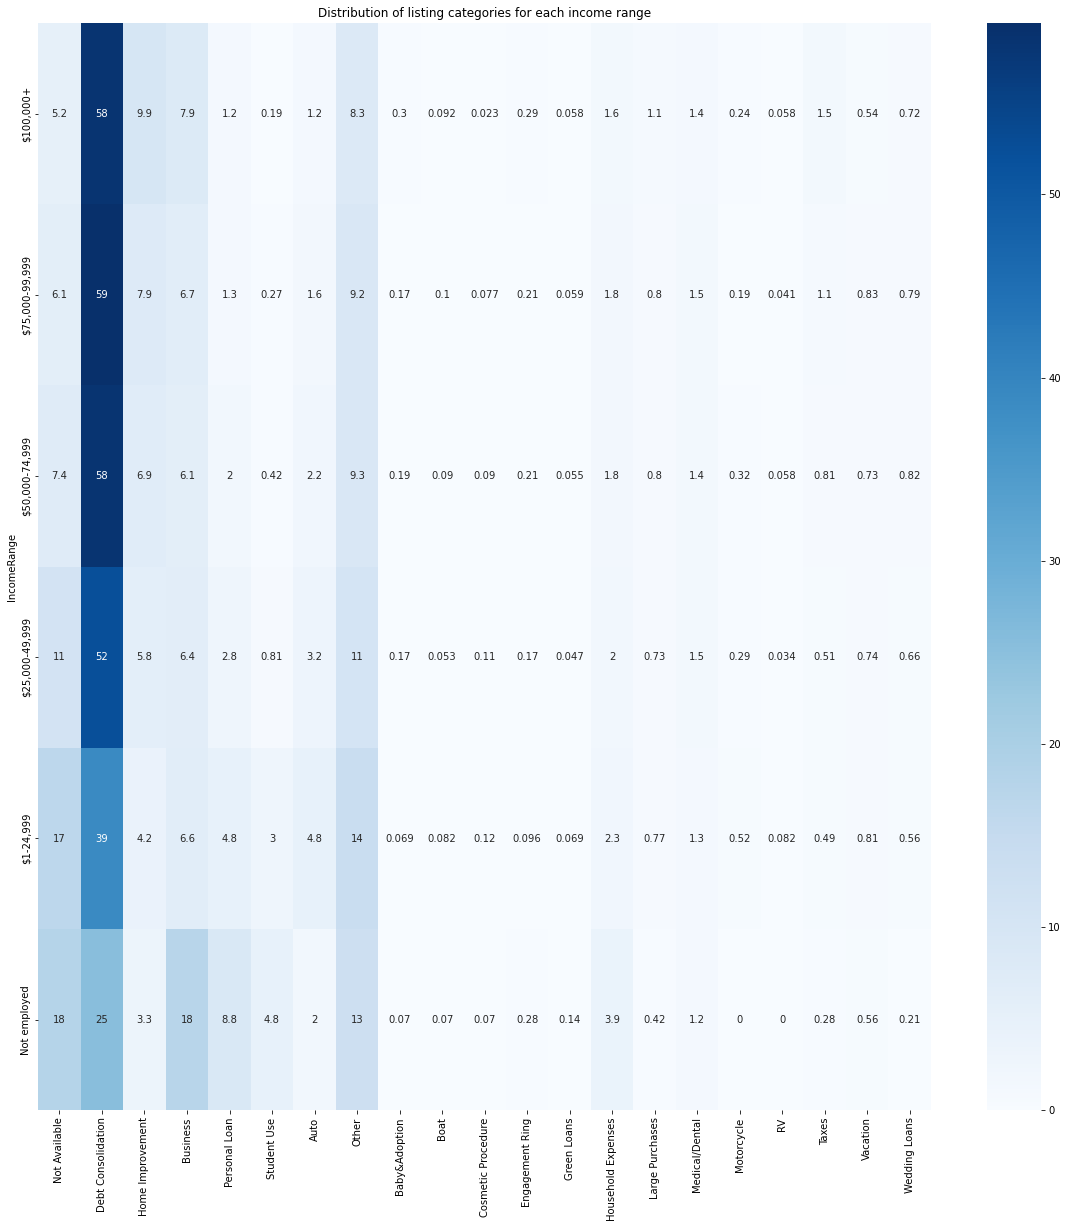

In [53]:
#plot heatmap
plt.figure(figsize=(20,20))
plt.title('Distribution of listing categories for each income range')
sb.heatmap(counts, annot = True, cmap = "Blues");

This graphic has a lot about it but i'll focus on the three most obvious. The frequency of loans taken out for debt consolidation and home improvement increases with the income range while the frequency of loans taken out for household expenses and personal loans decreases. The frequency of business loans increases with the income range with an exception for the unemployed.

The relationship between loans for home improvement and income range can be further highlighted in the graphic below

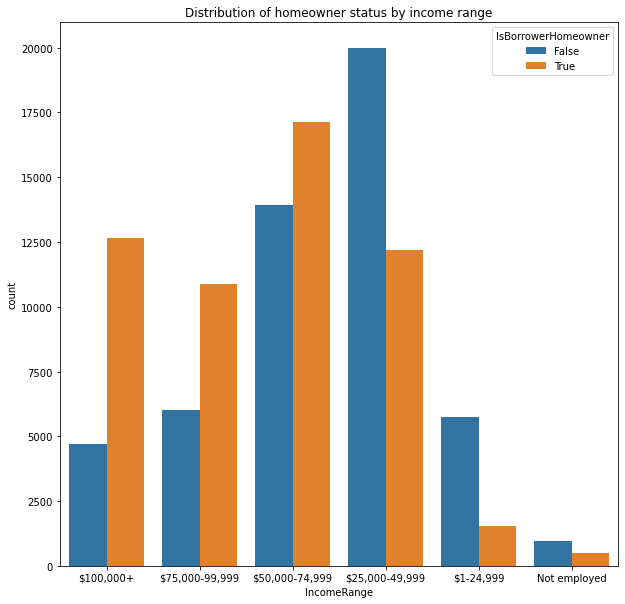

In [54]:
#plot bar chart
plt.figure(figsize = [10, 10])
plt.title('Distribution of homeowner status by income range')
sb.countplot(data = df,x='IncomeRange' ,hue ='IsBorrowerHomeowner');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> 1. BorrowerRate ,BorrowerAPR ,Term , LenderYield , EstimatedEffectiveYield, EstimatedLoss, and EstimatedReturn all have high correlation between each other. 
2. The percentage of 'charged off', 'defaulted' and 'past due' loans decreases as the prosper rating increases. 
3. Another noticeable feature would be the relative increase in `$100,000+` earners as the rating increases as well as a decrease in unemployed and low earners.
4. The median Debt to Income Ratio slightly increases as the income range decreases.The standard deviiation also increases as the income range decreases. The `$75,000-$99,999` range has the smallest spread
5. The median Debt to income ratio is similar across prosper ratings. The major difference is the distribution. The kernels become more triangular and the standard deviation decreases as the rating increases 
6. the larger spread of the distribution of loan original amount as the Income range increases. The median loan amount increases asthe income range increases
7. The frequency of loans taken out for debt consolidation increases with the income range while the frequency of loans taken out for household expenses decreases.
8. The frequency of business loans increases with the income range with an exception for the unemployed.

<a id = "Multi"></a>
## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

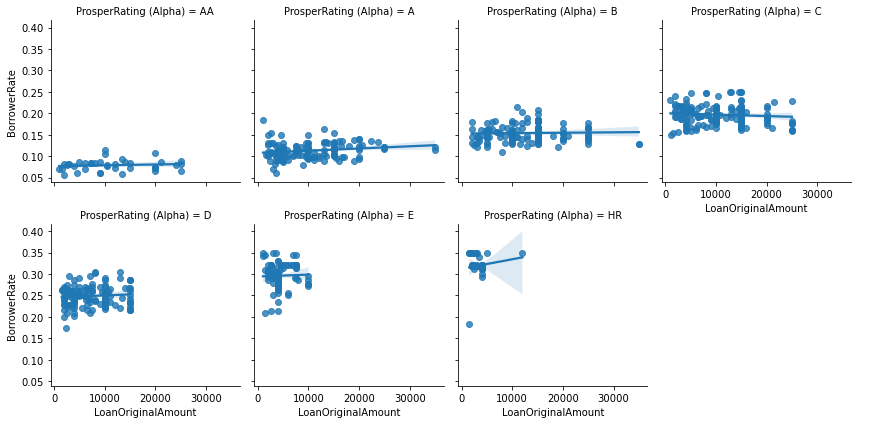

In [55]:
#plot facet grid
g = sb.FacetGrid(data = subset, col = 'ProsperRating (Alpha)',col_wrap=4, sharey=True,sharex=True)
plt.title('Relationship between Borrower rate and Loan original amount for each prosper rating')
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerRate')
g.add_legend()

There doesn't seem to be a trend connecting all three variables together,but the borrower rate decreases as the rating gets higher. It also reconfirms an earlier observation that the spread of loan amounts increases as the rating increases 

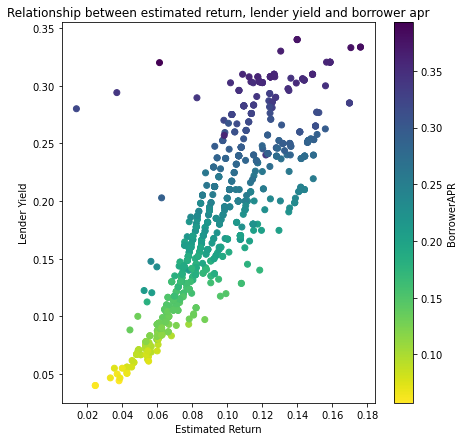

In [56]:
#plot a scatter plot displaying the correlation between these variables using color as the encoding
plt.figure(figsize=[7,7])
plt.scatter(data=df.sample(1000), x = 'EstimatedReturn', y = 'LenderYield', c = 'BorrowerAPR', cmap = 'viridis_r') 
plt.title('Relationship between estimated return, lender yield and borrower apr')
plt.xlabel('Estimated Return')
plt.ylabel('Lender Yield')
plt.colorbar(label ='BorrowerAPR')

The graph seems to indicate a three way correlation between the variables

Going back to a point raised in an earlier section, let us explore the relationship between Effective yield and the Loan amount by splitting it into terms

In [57]:
corr1=df.groupby('Term',as_index=True)['EstimatedEffectiveYield','LoanOriginalAmount'].corr()
coeff1=[]
for i in range(corr1['EstimatedEffectiveYield'].shape[0]):
    if i%2!=0:
        coeff1.append(corr1['EstimatedEffectiveYield'].iloc[i])

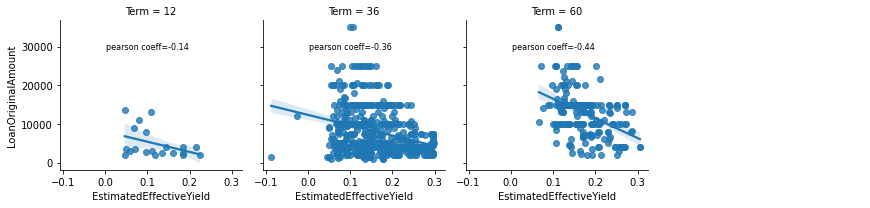

In [58]:
g = sb.FacetGrid(data = subset, col = 'Term',col_wrap=4, sharey=True,)
g.map(sb.regplot, 'EstimatedEffectiveYield','LoanOriginalAmount')
i=0
#add text to facets
for ax in g.axes:
        ax.annotate("pearson coeff="+str(format(coeff1[i],'.2f')), (0.1, 30000),
        ha='center', va='center', fontsize=8, color='black')
        i+=1
g.add_legend()

The correlation between  the yield and the amount gets stronger as the loan term increases

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> 1. The correlation between the yield and the amount gets stronger as the loan term increases
2. There is a three way correlation between the borrower apr, estimated return and lender yield



<a id = "Conc"></a>
## Conclusions
> 1. The correlation between the yield and the amount gets stronger as the loan term increases
2. There is a three way correlation between the borrower apr, estimated return and lender yield
> 1. BorrowerRate ,BorrowerAPR ,Term , LenderYield , EstimatedEffectiveYield, EstimatedLoss, and EstimatedReturn all have high correlation between each other. 
2. The percentage of 'charged off', 'defaulted' and 'past due' loans decreases as the prosper rating increases. 
3. Another noticeable feature would be the relative increase in `$100,000+` earners as the rating increases as well as a decrease in unemployed and low earners.
4. The median Debt to Income Ratio slightly increases as the income range decreases.The standard deviiation also increases as the income range decreases. The `$75,000-$99,999` range has the smallest spread
5. The median Debt to income ratio is similar across prosper ratings. The major difference is the distribution. The kernels become more triangular and the standard deviation decreases as the rating increases 
6. the larger spread of the distribution of loan original amount as the Income range increases. The median loan amount increases asthe income range increases
7. The frequency of loans taken out for debt consolidation increases with the income range while the frequency of loans taken out for household expenses decreases.
8. The frequency of business loans increases with the income range with an exception for the unemployed.

<a id = "Lim"></a>
## Limitations


1. Dataset had too many variables so it was hard to pick what variables to focus on for the analysis. The data could be broken down into smaller tables